In [1]:
#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/06/22/1466602368.h5'
#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/06/22/1466610159.h5'
#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/06/22/1466607356.h5'
#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/06/26/1466970325.h5'
filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/15/1481815921.h5'

In [2]:
#!/usr/bin/env python
import katdal
import numpy as np
import os
import textwrap
import time
from datetime import timedelta 
%pylab inline
from pylab import axes, figure, legend, plot,plt, savefig, sys, text, title,xlabel, xticks, ylabel, ylim, yticks
from matplotlib.ticker import AutoMinorLocator


Populating the interactive namespace from numpy and matplotlib


In [3]:
def hours(t): # given an array of UTC timestamp turn to UT hours
    gmt=time.gmtime(t[0]) # take first one for offsets
    yy= gmt.tm_year
    mm=gmt.tm_mon
    dd=gmt.tm_mday
    wd=gmt.tm_wday
    yd=gmt.tm_yday
    ut0 = time.mktime((yy,mm,dd,0,0,0,0,gmt.tm_wday,gmt.tm_isdst)) # start of UT dat
    hour=(t-ut0)/3600.
    return hour

In [4]:
-

In [5]:

-


In [6]:
-

In [7]:
def plot_bpcal_selection(f):
    fig = plt.figure(figsize=(21,15))
    try:
        for pol in ('h','v'):
            f.select(targets=f.catalogue.filter(tags='bpcal'), corrprods='cross', pol=pol, scans='track')
            crosscorr = [(f.inputs.index(inpA), f.inputs.index(inpB)) for inpA, inpB in f.corr_products]
            #extract the fringes
            fringes = np.angle(f.vis[:,:,:])
            #For plotting the fringes
            fig.subplots_adjust(wspace=0., hspace=0.)
            #debug_here()
            for n, (indexA, indexB) in enumerate(crosscorr):
                subplot_index = (len(f.ants) * indexA + indexB + 1) if pol == 'h' else (indexA + len(f.ants) * indexB + 1)
                ax = fig.add_subplot(len(f.ants), len(f.ants), subplot_index)
                ax.imshow(fringes[:,:,n],aspect=fringes.shape[1]/fringes.shape[0])
                ax.set_xticks([])
                ax.set_yticks([])
                if pol == 'h':
                    if indexA == 0:
                        ax.xaxis.set_label_position('top')
                        ax.set_xlabel(f.inputs[indexB][3:],size='xx-large')
                    if indexB == len(f.ants) - 1:
                       ax.yaxis.set_label_position('right')
                       ax.set_ylabel(f.inputs[indexA][3:], rotation='horizontal',size = 'xx-large')
                else:
                    if indexA == 0:
                        ax.set_ylabel(f.inputs[indexB][3:], rotation='horizontal',size='xx-large')
                    if indexB == len(f.ants) - 1:
                        ax.set_xlabel(f.inputs[indexA][3:],size='xx-large')

    except KeyError, error:
            print 'Failed to read scans from File: %s with Key Error: %s' % (f, error)
    except ValueError, error:
            print 'Failed to read scans from File: %s with Value Error: %s' % (f, error)

In [8]:
-

In [9]:
print "Opening %s using katfile, this might take a while" % (filename,)
f=katdal.open(filename)

Opening /var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/15/1481815921.h5 using katfile, this might take a while


Name: /var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/15/1481815921.h5 (version 3.0)
Observer: Nadeem  Experiment ID: 20161215-0062
Description: 'Calibrator Switching Effects'
Observed from 2016-12-15 17:32:03.424 SAST to 2016-12-15 23:22:42.524 SAST
Dump rate / period: 0.25011 Hz / 3.998 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m006,m007,m008,m010,m014,m015,m021,m022,m025,m031,m062,m063  24      312
Spectral Windows: 1
  ID  Product    CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0  bc856M4k    1284.000         856.000          4096      208.984
-------------------------------------------------------------------------------
Data selected according to the following criteria:
  subarray=0
  ants=['m008', 'm010', 'm007', 'm014', 'm006', 'm063', 'm015', 'm021', 'm022', 'm025', 'm031', 'm062']
  spw=0
-------------------------------------------------------------------------------
Shape: (5262 dumps, 4096 channels, 312 

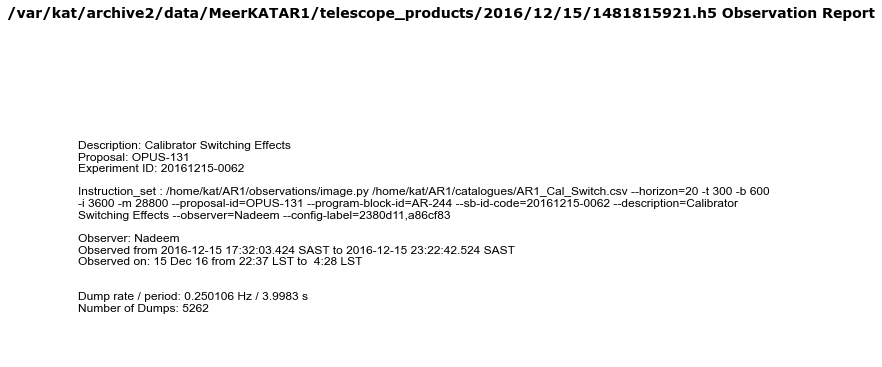

In [10]:
#start a figure
figure(figsize = (13,6))
axes(frame_on=False)
xticks([])
yticks([])
title(filename+" Observation Report",fontsize=14, fontweight="bold")

frontpage = make_frontpage(f)
text(0,0,frontpage,fontsize=12)
print f

plotting m006_hh time series
plotting m007_hh time series
plotting m008_hh time series
plotting m010_hh time series
plotting m014_hh time series
plotting m015_hh time series
plotting m021_hh time series
plotting m022_hh time series
plotting m025_hh time series
plotting m031_hh time series
plotting m062_hh time series
plotting m063_hh time series
plotting m006_vv time series
plotting m007_vv time series
plotting m008_vv time series
plotting m010_vv time series
plotting m014_vv time series
plotting m015_vv time series
plotting m021_vv time series
plotting m022_vv time series
plotting m025_vv time series
plotting m031_vv time series
plotting m062_vv time series
plotting m063_vv time series


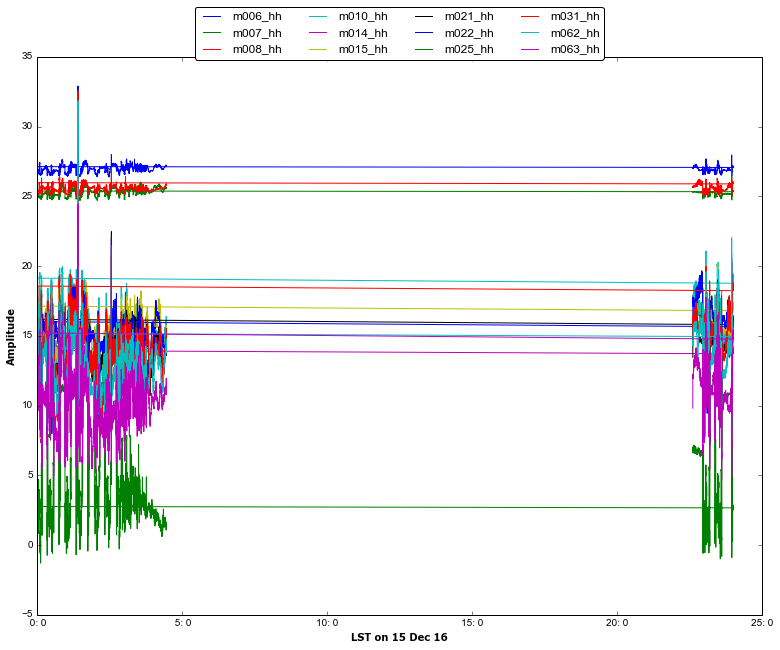

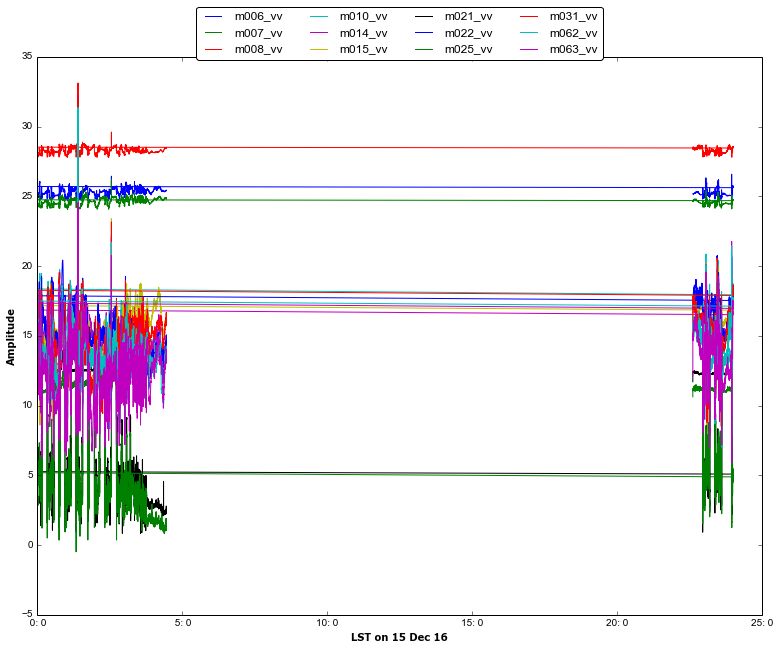

In [11]:
count=0
ants=f.ants
pol=['h','v']
starttime = time.strftime('%d %b %y', time.localtime(f.start_time))
plot_time_series(ants, pol[0], count, starttime)
count=count+1
plot_time_series(ants, pol[1], count, starttime)

TypeError: 'LazyIndexer' object is not callable

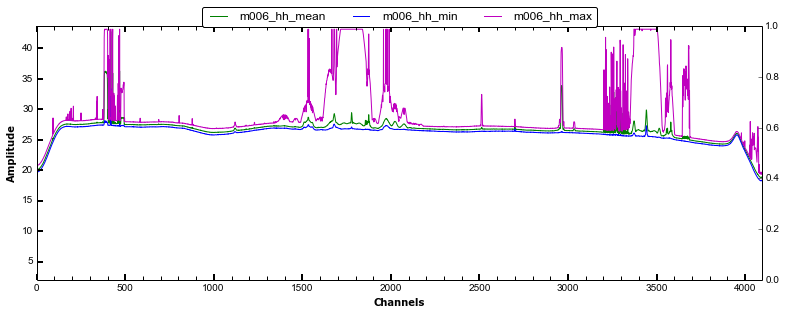

In [12]:
for ant in ants:
    plot_spectrum(pol,filename,starttime,ant)

In [ ]:
f.select()
if f.catalogue.filter(tags='bpcal'):
    print "Plotting bpcal fringes."
    plot_bpcal_selection(f)
else:
    print "No bpcal tags found in catalog, we wont plot bpcal fringes."

In [ ]:
if f.catalogue.filter(tags='target'):
    print "Plotting target correlation spectra."
    plot_target_selection(f)
else:
    print "No target tags found in catalog, we wont plot the target cross correlation spectra."

In [ ]:
def plot_environmental_sensors(f):
    print "Getting wind and temperature sensors"
    fig=figure(figsize=(13,10))
    ax1 = fig.add_subplot(211)
    temp=[]
    hum=[] 
    press=[]
    wind=[]
    atime=[]
    htime=[]
    ptime=[]
    wtime=[]
    
    t_sens=f.file['TelescopeState']['anc_weather_temperature']
    for n in range(len(t_sens)):
        tval=t_sens[n][1][1:-2]   # 2nd value is a string
        temp.append(float(tval))
        atime.append(float(t_sens[n][0]))        
    #print "Temperatures", n
    # filled airtemp, next pressure    
    p_sens=f.file['TelescopeState']['anc_weather_pressure']
    for n in range(len(p_sens)):
        pval=p_sens[n][1][1:-2]   # 2nd value is a string
        press.append(float(pval))
        ptime.append(float(p_sens[n][0]))
    #print "Pressures:",n
    # filled pressure, next humidity       
    
    h_sens=f.file['TelescopeState']['anc_weather_humidity']
    for n in range(len(h_sens)):
        hval=h_sens[n][1][1:-2]   # 2nd value is a string
        hum.append(float(hval))
        htime.append(float(h_sens[n][0]))
    #print "Humidities:" ,n
    #filled humidity, next speed
    w_sens=f.file['TelescopeState']['anc_weather_wind_speed']
    for n in range(len(w_sens)):
        wval=w_sens[n][1][1:-2]   # 2nd value is a string
        wind.append(float(wval))
        wtime.append(float(w_sens[n][0]))
    #print "Winds:",n
    
    """
    Convert them all to numpy arrays from lists

    """
    airtemp=np.array(temp)
    pressure=np.array(press)
    humidity=np.array(hum)
    windspeed=np.array(wind)
    atime=np.array(atime)
    ptime=np.array(ptime)
    htime=np.array(htime)
    wtime=np.array(wtime)
    p10=0.1*pressure
    
    atime=hours(atime)
    ptime=hours(ptime)
    htime=hours(htime)
    wtime=hours(wtime)
    
    ax1.plot(atime,airtemp,'g-')
    
    ylim(ymin=-1,ymax=35)
    mintemp=min(airtemp)
    maxtemp=max(airtemp)
    if maxtemp>=35:
        ylim(ymax=(maxtemp+1))
    if mintemp<=(-1.0):
        ylim(ymin=(mintemp-1))
    locs,labels=xticks()
    for i in range(len(locs)):
        labels[i]=("%2.0f:%2.0f"%(np.modf(locs[i])[1], np.modf(locs[i])[0]*60))
    xticks(locs,labels)
    ax1.grid(axis='y', linewidth=0.15, linestyle='-', color='k')
    ax1.set_xlabel("UT on "+starttime, fontweight="bold")
    ax1.set_ylabel('Temperature (Deg C)', color='g',fontweight="bold")
    for tl in ax1.get_yticklabels():
        tl.set_color('g')

    #Relative to Absolute
    rh=humidity
    t=airtemp
    Pws=[]
    Pw=[]
    ah=[]
    for m in range(len(rh)):
        Pws.append(6.1162*(10**((7.5892*t[m])/(t[m]+240.71))))
    for m in range(len(rh)):
        Pw.append(Pws[m]*(rh[m]/100))
    for m in range(len(rh)):
        ah.append(2.11679*((Pw[m]*100)/(273.16+t[m])))

    ax2=ax1.twinx()
    ax2.plot(htime,ah,'c-')
    ylim(ymin=1,ymax=8)
    minah=min(ah)
    maxah=max(ah)
    if maxah>=8:
        ylim(ymax=(maxah+1))
    if minah<=(1.0):
        ylim(ymin=(minah-1))
    locs,labels=xticks()
    ax2.grid(axis='y', linewidth=0.15, linestyle='-', color='k')
    ax2.set_ylabel('Absolute Humidity g/m^3', fontweight="bold",color='c')
    for tl in ax2.get_yticklabels():
        tl.set_color('c')

    ax3=fig.add_subplot(212)
    ax3.grid(axis='y', linewidth=0.15, linestyle='-', color='k')
    ax3.plot(ptime,p10,'r-')   #p10 is presssure divided by 10
    
    ylim(ymin=87,ymax=92)
    minairpress=min(p10)
    maxairpress=max(p10)
    if maxairpress>=92:
        ylim(ymax=(maxairpress+1))
    if minairpress<=87:
        ylim(ymin=(minairpress-1))
    for i in range(len(locs)):
        labels[i]=("%2.0f:%2.0f"%(np.modf(locs[i])[1], np.modf(locs[i])[0]*60))
    xticks(locs,labels)
    ax3.grid(axis='y', linewidth=0.15, linestyle='-', color='k')
    ax3.set_ylabel('Air Pressure (kPa)', fontweight="bold",color='r')
    for tl in ax3.get_yticklabels():
        tl.set_color('r')
    ax4=ax3.twinx()
    ax4.plot(wtime,windspeed,'b-')
    wspeed=windspeed
    ylim(ymin=-0.5,ymax=16)
    minwind=min(wspeed)
    maxwind=max(wspeed)
    if maxwind>=16:
        ylim(ymax=(maxwind+1))
    if minwind<=-0.5:
        ylim(ymin=(minwind-1))
    ax4.set_xlabel("UT on "+starttime,fontweight="bold")
    ax4.set_ylabel('Wind Speed (m/s)',fontweight="bold", color='b')
    for tl in ax4.get_yticklabels():
        tl.set_color('b')

In [ ]:
plot_environmental_sensors(f)